# Загрузка и анализ данных

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('train.tsv')
test_data = pd.read_csv('test.tsv')

Работаем только с товарами, представленными в тестовой выборке

In [3]:
items_to_study = set(data['item_id']) & set(test_data['item_id'])

Разобьём тренировочную выборку на 2 части

In [4]:
data_train = data[:len(data)*5/6]
data_test = data[len(data)*5/6:]

Рассмотрим проекцию по одному товару

In [5]:
def feature_distrib_plot(data, feature_name):
    plt.figure(figsize=(10, 3))
    plt.title(feature_name)
    en = np.array(list(enumerate(data[feature_name].values)))
    plt.plot(en[:,0], en[:,1])
    plt.show()

<IPython.core.display.Javascript object>


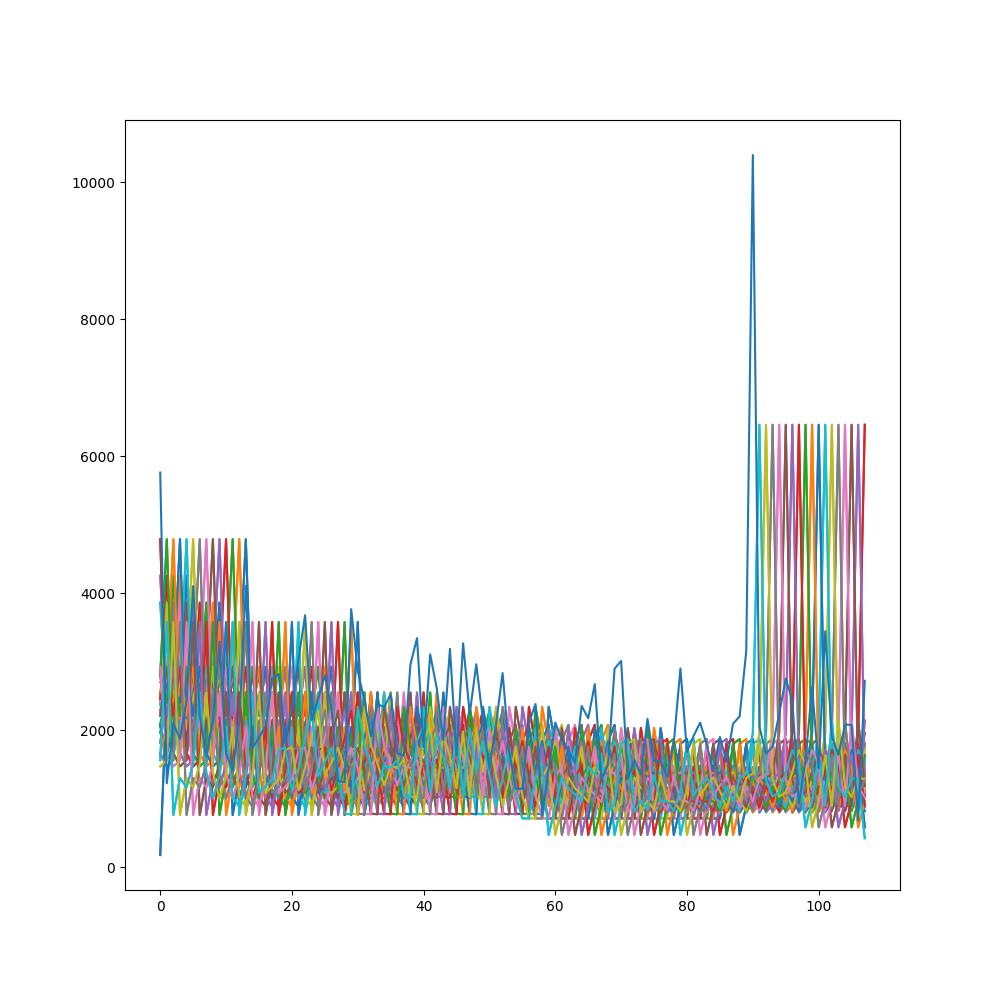

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [14]:
import matplotlib.pylab as plt
%matplotlib notebook
plt.figure(figsize=(10, 10))
item_id = 20447918
vals = data['y'][data['shift']==1][data['item_id']==item_id]
for i in range(1, 61):
    en1 = np.array(list(enumerate(data[data['shift']==1][data['item_id']==item_id]['f{}'.format(i)].values)))
    plt.plot(en1[:,0], en1[:, 1])
plt.plot(range(len(vals)), vals)
plt.show()

![title](280px-Kiselyov-2014_66401280_orig_.jpeg)

Первые и последние признаки совпадают на 100%. Сдвинем признаки, и итоговое значение

<IPython.core.display.Javascript object>


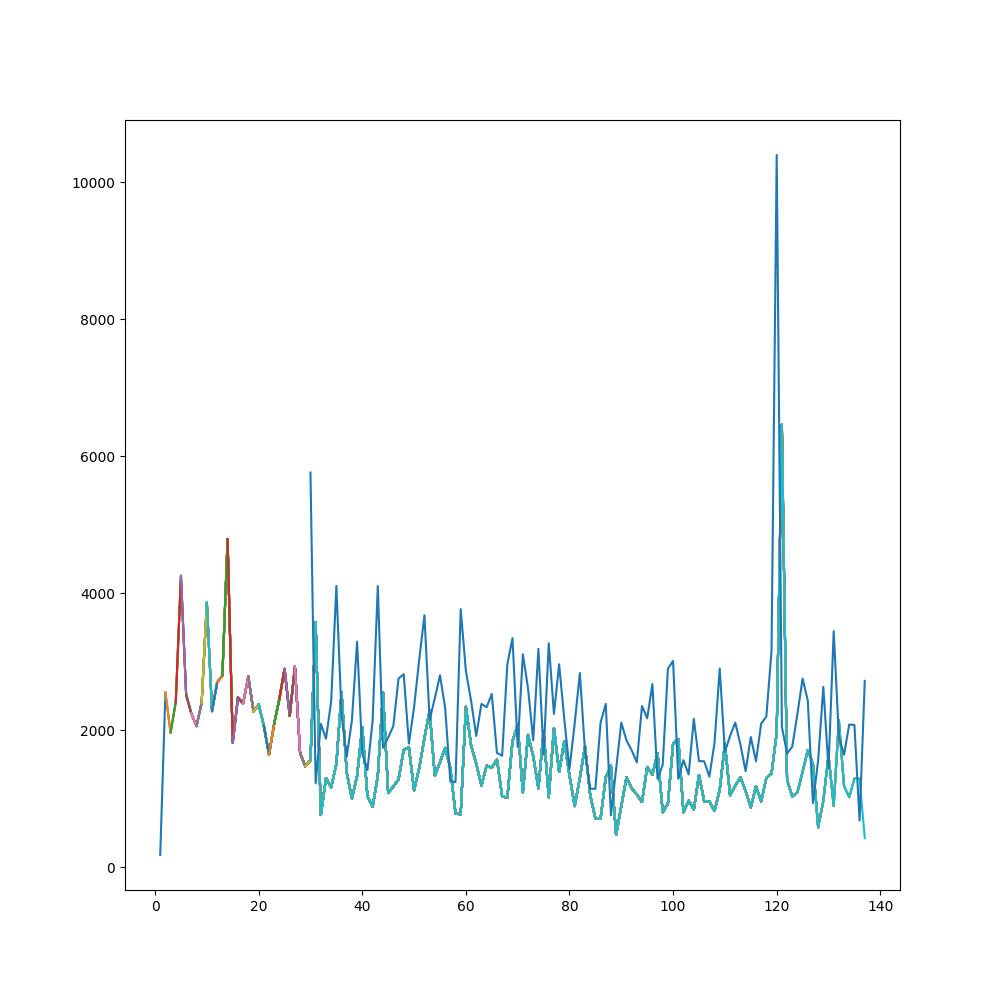

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [15]:
import matplotlib.pylab as plt
%matplotlib notebook
plt.figure(figsize=(10, 10))
item_id = 20447918
vals = data['y'][data['shift']==1][data['item_id']==item_id]
for i in range(1, 31):
    en1 = np.array(list(enumerate(data[data['shift']==1][data['item_id']==item_id]['f{}'.format(i)].values)))
    plt.plot(en1[:,0]+np.ones((len(en1[:,0]),)) * i, en1[:, 1])
plt.plot(range(len(vals)) + np.ones(len(vals)) * 30, vals)
plt.show()

In [19]:
en1 = np.array(list(enumerate(data[data['shift']==1][data['item_id']==item_id]['f{}'.format(30)].values)))[:,1]
vals = data['y'][data['shift']==1][data['item_id']==item_id]
en1[1:10]/vals[:9]

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


113     0.621138
804     0.621423
1500    0.621118
2190    0.621131
2882    0.621131
3577    0.621194
4280    0.621342
4976    0.621118
5673    0.621382
Name: y, dtype: float64

Как видно, f30 и y, совпадают со сдвигом на 1 неделю. Взглянем ещё раз на данные

In [21]:
data[data['shift']==1][data['item_id']==item_id][['f{}'.format(i) for i in range(1, 31)]]

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30
113,176.0,2553.0,1962.0,2412.0,4254.0,2519.0,2243.0,2057.0,2402.0,3863.0,...,2063.0,1643.0,2094.0,2456.0,2895.0,2210.0,2925.0,1665.0,1470.0,1560.0
804,2553.0,1962.0,2412.0,4254.0,2519.0,2243.0,2057.0,2402.0,3863.0,2277.0,...,1643.0,2094.0,2456.0,2895.0,2210.0,2925.0,1665.0,1470.0,1560.0,3579.0
1500,1962.0,2412.0,4254.0,2519.0,2243.0,2057.0,2402.0,3863.0,2277.0,2699.0,...,2094.0,2456.0,2895.0,2210.0,2925.0,1665.0,1470.0,1560.0,3579.0,760.0
2190,2412.0,4254.0,2519.0,2243.0,2057.0,2402.0,3863.0,2277.0,2699.0,2797.0,...,2456.0,2895.0,2210.0,2925.0,1665.0,1470.0,1560.0,3579.0,760.0,1300.0
2882,4254.0,2519.0,2243.0,2057.0,2402.0,3863.0,2277.0,2699.0,2797.0,4789.0,...,2895.0,2210.0,2925.0,1665.0,1470.0,1560.0,3579.0,760.0,1300.0,1164.0
3577,2519.0,2243.0,2057.0,2402.0,3863.0,2277.0,2699.0,2797.0,4789.0,1817.0,...,2210.0,2925.0,1665.0,1470.0,1560.0,3579.0,760.0,1300.0,1164.0,1505.0
4280,2243.0,2057.0,2402.0,3863.0,2277.0,2699.0,2797.0,4789.0,1817.0,2474.0,...,2925.0,1665.0,1470.0,1560.0,3579.0,760.0,1300.0,1164.0,1505.0,2550.0
4976,2057.0,2402.0,3863.0,2277.0,2699.0,2797.0,4789.0,1817.0,2474.0,2389.0,...,1665.0,1470.0,1560.0,3579.0,760.0,1300.0,1164.0,1505.0,2550.0,1380.0
5673,2402.0,3863.0,2277.0,2699.0,2797.0,4789.0,1817.0,2474.0,2389.0,2784.0,...,1470.0,1560.0,3579.0,760.0,1300.0,1164.0,1505.0,2550.0,1380.0,1000.0
6365,3863.0,2277.0,2699.0,2797.0,4789.0,1817.0,2474.0,2389.0,2784.0,2272.0,...,1560.0,3579.0,760.0,1300.0,1164.0,1505.0,2550.0,1380.0,1000.0,1331.0


Итак, все f - предыдущие значения y, f30 - предыдущая, f29 - 2 недели назад и так далее. Таким образом, значительную часть (~2/3) ответов мы знаем уже сразу.

In [22]:
test_1 = pd.concat([test_data[['f28', 'f29', 'f30', 'week', 'shift', 'item_id']],
               pd.DataFrame(columns=['y_guess'])])

In [24]:
for k, t in test_1.iterrows():
    guess = (test_1[(test_1['week'] == (t['week'])%53 + 1) & (test_1['shift']==1) & (test_1['item_id'] == t['item_id'])]['f30']/0.62111882614).values
    if len(guess) > 0:
        test_1.loc[k, 'y_guess'] = guess[0]

In [25]:
test_1

,f28,f29,f30,item_id,shift,week,y_guess
0,1020.0,1293.0,1290.0,20447918.0,3.0,3.0,1497.3
1,18320.0,24116.0,21307.0,20447902.0,3.0,3.0,27033.5
2,245652.0,286179.0,285904.0,20447732.0,3.0,3.0,297560
3,18930.0,29643.0,33970.0,20443951.0,3.0,3.0,29471
4,30.0,0.0,0.0,20443944.0,3.0,3.0,16.1
5,118744.0,132368.0,117730.0,20443943.0,3.0,3.0,146243
6,58029.0,62126.0,71857.0,20443941.0,3.0,3.0,67735.8
7,58033.0,98839.0,76432.0,20443902.0,3.0,3.0,111942
8,62347.0,106921.0,84194.0,20443901.0,3.0,3.0,102631
9,1650.0,2568.0,1902.0,20443308.0,3.0,3.0,3542


In [26]:
len(test_1) - len(test_1.dropna())

684

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


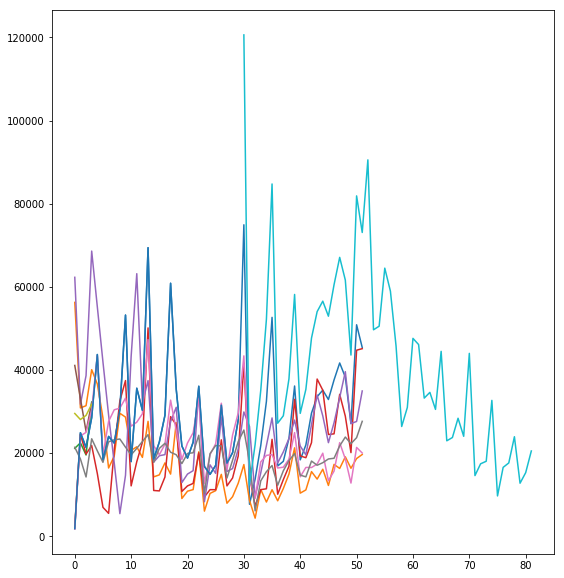

In [29]:
item_id = 20440562
item_id_1 = 20440984
item_id_2 = 20442102
plt.figure(figsize=(9, 10))
real = data['y'][data['shift']==1][data['item_id']==item_id]
vals = data[data['shift']==1][data['item_id']==item_id]
vals_1 = data[data['shift']==1][data['item_id']==item_id_1]
vals_2 = data[data['shift']==1][data['item_id']==item_id_2]
plt.plot(range(len(vals[:52])), vals['f1'][:52])
plt.plot(range(len(vals[52:104])), vals['f1'][52:104])
plt.plot(range(len(vals[104:156])), vals['f1'][104:156])
plt.plot(range(len(vals_1[:52])), vals_1['f1'][:52])
plt.plot(range(len(vals_1[52:104])), vals_1['f1'][52:104])
plt.plot(range(len(vals_1[104:156])), vals_1['f1'][104:156])
plt.plot(range(len(vals_2[:52])), vals_2['f1'][:52]*0.05)
plt.plot(range(len(vals_2[52:104])), vals_2['f1'][52:104]*0.05)
plt.plot(range(len(vals_2[104:156])), vals_2['f1'][104:156]*0.05)
plt.plot(range(len(real[:52]))+np.ones(len(real[:52]))*30, real[:52])
plt.plot(range(30), vals[['f{}'.format(i) for i in range(1, 31)]].values[0])

Как видно, некоторая годовая переодичность присутствует в данных. Будем обучать на XDBRegressor

In [30]:
from xgboost import XGBRegressor
from sklearn.cross_validation import cross_val_score

/usr/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [31]:
from sklearn.utils import check_array
from sklearn.metrics import make_scorer


def smape(y_true, y_pred):
    y_true = check_array(y_true)
    y_pred = check_array(y_pred)
    return np.mean(np.abs((y_true - y_pred)) / ((np.abs(y_true) + np.abs(y_pred))*0.5)) * 100

smape_scorer = make_scorer(smape, greater_is_better=False)

# Обучение

Преобразуем датасет - извлечём полную историю продуктов, и создадим новые обучающие выборки.

In [33]:
def extract_item_price_history(data, item_id):
    item_data = data[data['shift'] == 1][data[data['shift'] == 1]['item_id'] == item_id]
    return [v for v in list(item_data['f1'].values) if v != 0] + \
                list(np.reshape(item_data[['f{}'.format(i) for i in range(2, 31)]].values[-1:], (29, )))

In [34]:
items = set(data['item_id']) & set(test_data['item_id'])
items_hist = dict()
for item in items:
    items_hist[item] = extract_item_price_history(data, item)

In [35]:
hist_lens = np.array([[len(items_hist[item]), item] for item in items])

Посмотрим на размеры историй предметов

In [36]:
np.sort(hist_lens[:,0])

array([ 29,  29,  29,  29,  29,  29,  29,  29,  29,  29,  29,  29,  29,
        30,  33,  33,  35,  38,  40,  42,  52,  61,  62,  64,  66,  74,
        74,  75,  75,  75,  78,  79,  83,  86,  94,  98, 100, 104, 106,
       107, 107, 108, 108, 113, 113, 115, 118, 121, 121, 122, 122, 123,
       129, 134, 134, 136, 136, 136, 136, 136, 137, 137, 137, 137, 137,
       137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137,
       137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137,
       137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137,
       137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137,
       137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137,
       137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137,
       137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137,
       137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137,
       137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 13

Выделяем 3 группы - те, для которых известна история за 2 года, за 1 год, меньше чем за год. Обучаться будем для них отдельно

In [38]:
def get_histories(train, test):
    items_hist = dict()
    for item in items_to_study:
        items_hist[item] = extract_item_price_history(pd.concat([train.drop(labels=['y'], axis=1), test]), item)
    return items_hist
    
    

In [39]:
hist = get_histories(data_train, data_test)

In [40]:
lens = np.array([[h, len(hist[h])] for h in hist])
cat_0 = lens[:, 0][lens[:,1] <= 52]
cat_1 = lens[:, 0][(lens[:,1] <= 104) & (lens[:, 1] > 52)]
cat_2 = lens[:, 0][lens[:,1] > 104]

Выберем признаки

В качестве признаков будем брать недавние значения, среднее за недавнее время, а также значения год назад и 2 года назад, если возможно

In [41]:
def make_set(history, cat):
    sample = []
    if list(cat) == list(cat_2):
        for item in cat:
            h = history[item]
            for i in range(105, len(h)):
                sample.append([h[i], h[i-1], h[i-2], h[i-3], np.mean(h[i-20:i]),
                               h[i-51] - h[i-52], h[i-52] - h[i-53], h[i-53]-h[i-54], np.mean(h[i-20:i]) - np.mean(h[i-60: i-30]), 
                               h[i-101] - h[i-102], h[i-102] - h[i-103], h[i-103] - h[i-104], h[i-104] - h[i-105]])
        return pd.DataFrame(data=sample, columns=['y', '1', '2', '3', 'mean1', '51', '52', '53', 'mean2', '102', '103', '104', '105'])
    if list(cat) == list(cat_1):
        for item in cat:
            h = history[item]
            for i in range(54, len(h)):
                sample.append([h[i], h[i-1], h[i-2], h[i-48], h[i-49], h[i-50],
                               h[i-51], h[i-52], h[i-53], h[i-54]])
        return pd.DataFrame(data=sample, columns=['y', '1', '2', '48','49', '50', '51', '52', '53', '54'])
    if list(cat) == list(cat_0):
        for item in cat:
            h = history[item]
            for i in range(30, len(h)):
                sample.append([h[i], h[i-1], h[i-2], h[i-3],  h[i-12], h[i-13], h[i-14]])
        return pd.DataFrame(data=sample, columns=['y', '1', '2', '3',  '12', '13', '14'])

In [42]:
set_2 = make_set(hist, cat_2)

In [43]:
regressor = XGBRegressor(max_depth=14)
cross_val_score(regressor, X=set_2[list(set(set_2.columns)-(set(['y'])))], y=set_2['y'], scoring=smape_scorer)

/usr/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/usr/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/usr/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/usr/lib/python2.7/site-p

array([-22.18130988, -24.43808358, -23.56789255])

In [44]:
regressor.fit(set_2[list(set(set_2.columns)-(set(['y'])))][:len(set_2)*5/6], set_2['y'][:len(set_2)*5/6])
y_pred=regressor.predict(set_2[list(set(set_2.columns)-(set(['y'])))][len(set_2)*5/6:])
y = set_2['y'][len(set_2)*5/6:]

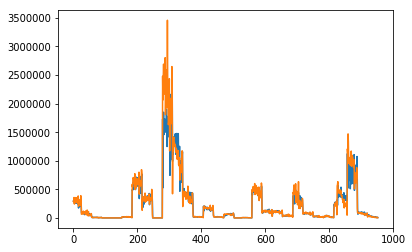

In [45]:
plt.figure()
plt.plot(range(len(y)), y_pred)
plt.plot(range(len(y)), y)

In [47]:
smape(y_pred, y)

/usr/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/usr/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


25.420165616791497

In [48]:
set_2 = make_set(hist, cat_1)

In [49]:
regressor = XGBRegressor(max_depth=7)
cross_val_score(regressor, X=set_2[list(set(set_2.columns)-(set(['y'])))], y=set_2['y'], scoring=smape_scorer)

/usr/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/usr/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/usr/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/usr/lib/python2.7/site-p

array([-24.95826116, -43.21488801, -28.3310683 ])

In [50]:
regressor.fit(set_2[list(set(set_2.columns)-(set(['y'])))][:len(set_2)*5/6], set_2['y'][:len(set_2)*5/6])
y_pred=regressor.predict(set_2[list(set(set_2.columns)-(set(['y'])))][len(set_2)*5/6:])
y = set_2['y'][len(set_2)*5/6:]

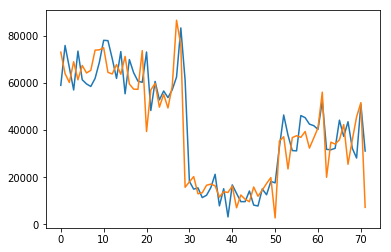

In [51]:
plt.figure()
plt.plot(range(len(y)), y_pred)
plt.plot(range(len(y)), y)

In [52]:
smape(y_pred, y)

/usr/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/usr/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


24.840245513837349

In [53]:
set_2 = make_set(hist, cat_0)

In [54]:
regressor = XGBRegressor(max_depth=14)
cross_val_score(regressor, X=set_2[list(set(set_2.columns)-(set(['y'])))], y=set_2['y'], scoring=smape_scorer)

/usr/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/usr/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/usr/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/usr/lib/python2.7/site-p

array([-79.75568515, -47.23148486, -78.65569671])

In [55]:
regressor.fit(set_2[list(set(set_2.columns)-(set(['y'])))][:len(set_2)*5/6], set_2['y'][:len(set_2)*5/6])
y_pred=regressor.predict(set_2[list(set(set_2.columns)-(set(['y'])))][len(set_2)*5/6:])
y = set_2['y'][len(set_2)*5/6:]

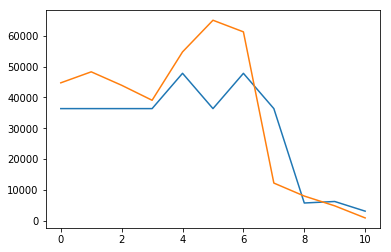

In [56]:
plt.figure()
plt.plot(range(len(y)), y_pred)
plt.plot(range(len(y)), y)

In [57]:
smape(y_pred, y)

/usr/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/usr/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


39.683223254537694

Теперь обучим на всей выборке и применим на тестовой

In [58]:
hist_test = get_histories(data, test_data)

In [59]:
def make_testset(history, cat):
    sample = []
    if list(cat) == list(cat_2):
        for item in cat:
            h = history[item]
            i = len(h)
            sample.append([h[i-1], h[i-2], h[i-3], np.mean(h[i-20:i]),
                               h[i-51] - h[i-52], h[i-52] - h[i-53], h[i-53]-h[i-54], np.mean(h[i-20:i]) - np.mean(h[i-60: i-30]), 
                               h[i-101] - h[i-102], h[i-102] - h[i-103], h[i-103] - h[i-104], h[i-104] - h[i-105], item])
        return pd.DataFrame(data=sample, columns=['1', '2', '3', 'mean1', '51', '52', '53', 'mean2', '102', '103', '104', '105', 'item_id'])
    if list(cat) == list(cat_1):
        for item in cat:
            h = history[item]
            i = len(h)
            sample.append([h[i-1], h[i-2], h[i-48], h[i-49], h[i-50],
                               h[i-51], h[i-52], h[i-53], h[i-54], item])
        return pd.DataFrame(data=sample, columns=['1', '2', '48','49', '50', '51', '52', '53', '54', 'item_id'])
    if list(cat) == list(cat_0):
        for item in cat:
            h = history[item]
            i = len(h)
            sample.append([h[i-1], h[i-2], h[i-3],  h[i-12], h[i-13], h[i-14], item])
        return pd.DataFrame(data=sample, columns=['1', '2', '3',  '12', '13', '14', 'item_id'])

In [60]:
hist = get_histories(data, test_data)

In [61]:
lens = np.array([[h, len(hist[h])] for h in hist])
cat_0 = lens[:, 0][lens[:,1] <= 52]
cat_1 = lens[:, 0][(lens[:,1] <= 104) & (lens[:, 1] > 52)]
cat_2 = lens[:, 0][lens[:,1] > 104]

In [62]:
set_2 = make_set(hist, cat_2)
test_set_2 = make_testset(hist_test, cat_2)

In [63]:
regressor = XGBRegressor(max_depth=5)
regressor.fit(set_2[list(set(set_2.columns)-(set(['y', 'item_id'])))], set_2['y'])

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [64]:
y_pred_2=regressor.predict(test_set_2[list(set(set_2.columns)-(set(['y', 'item_id'])))])

In [65]:
res_2 = np.hstack((np.reshape(y_pred_2, (len(y_pred_2), 1)), np.reshape(test_set_2['item_id'], (len(test_set_2), 1))))

/usr/lib/python2.7/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


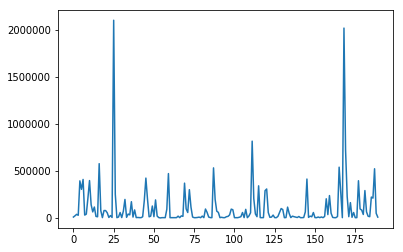

In [66]:
plt.figure()
plt.plot(range(len(y_pred_2)), y_pred_2)

In [67]:
for val, item in res_2:
    test_1.loc[(test_1['item_id'] == item) & (test_1['week'] == 5), 'y_guess'] = val/0.62111882614

In [68]:
len(test_1[test_1.isnull()['y_guess']==True])

132

In [69]:
for item in set(test_1[test_1.isnull()['y_guess']==True]['item_id'].values) & set(cat_2):
    test_1.loc[(test_1['item_id'] == item) & (test_1['week'] == 4), 'y_guess'] = res_2[res_2[:,1]==item][0][0]/0.62111882614

In [70]:
for item in set(test_1[test_1.isnull()['y_guess']==True]['item_id'].values) & set(cat_2):
    test_1.loc[(test_1['item_id'] == item) & (test_1['week'] == 3), 'y_guess'] = res_2[res_2[:,1]==item][0][0]/0.62111882614

In [71]:
test_1[test_1.isnull()['y_guess']==True]

,f28,f29,f30,item_id,shift,week,y_guess
626,0.0,0.0,0.0,20439124.0,3.0,4.0,NaN
1078,0.0,0.0,0.0,20439124.0,2.0,4.0,NaN
1143,110308.0,20860.0,73948.0,20448959.0,3.0,5.0,NaN
1149,76039.0,15730.0,48739.0,20448162.0,3.0,5.0,NaN
1150,820.0,430.0,930.0,20448312.0,3.0,5.0,NaN
1151,20502.0,4430.0,14446.0,20448455.0,3.0,5.0,NaN
1153,132455.0,16862.0,92100.0,20448805.0,3.0,5.0,NaN
1154,4177.0,1130.0,4582.0,20448900.0,3.0,5.0,NaN
1155,21533.0,4142.0,12837.0,20448958.0,3.0,5.0,NaN
1156,60620.0,11797.0,43900.0,20449309.0,3.0,5.0,NaN


In [72]:
len(test_1)-len(test_1.dropna())

111

In [73]:
set_2 = make_set(hist, cat_1)
test_set_2 = make_testset(hist_test, cat_1)

In [74]:
regressor = XGBRegressor(max_depth=5)
regressor.fit(set_2[list(set(set_2.columns)-(set(['y', 'item_id'])))], set_2['y'])

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [75]:
y_pred_2=regressor.predict(test_set_2[list(set(set_2.columns)-(set(['y', 'item_id'])))])

In [76]:
res_2 = np.hstack((np.reshape(y_pred_2, (len(y_pred_2), 1)), np.reshape(test_set_2['item_id'], (len(test_set_2), 1))))

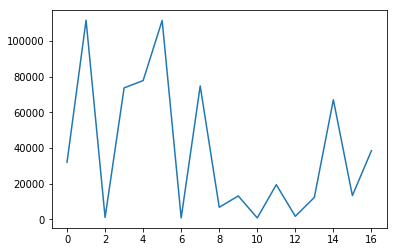

In [77]:
plt.figure()
plt.plot(range(len(y_pred_2)), y_pred_2)

In [78]:
for val, item in res_2:
    test_1.loc[(test_1['item_id'] == item) & (test_1['week'] == 5), 'y_guess'] = val/0.62111882614

In [79]:
for item in set(test_1[test_1.isnull()['y_guess']==True]['item_id'].values) & set(cat_1):
    test_1.loc[(test_1['item_id'] == item) & (test_1['week'] == 4), 'y_guess'] = res_2[res_2[:,1]==item][0][0]/0.62111882614

In [80]:
len(test_1)-len(test_1.dropna())

60

In [81]:
set_2 = make_set(hist, cat_0)
test_set_2 = make_testset(hist_test, cat_0)

In [82]:
regressor = XGBRegressor(max_depth=5)
regressor.fit(set_2[list(set(set_2.columns)-(set(['y', 'item_id'])))], set_2['y'])

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [83]:
y_pred_2=regressor.predict(test_set_2[list(set(set_2.columns)-(set(['y', 'item_id'])))])

In [84]:
res_2 = np.hstack((np.reshape(y_pred_2, (len(y_pred_2), 1)), np.reshape(test_set_2['item_id'], (len(test_set_2), 1))))

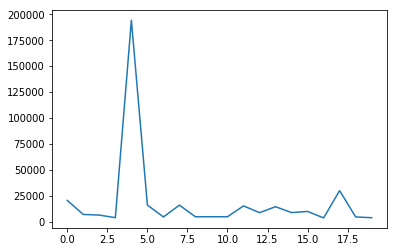

In [85]:
plt.figure()
plt.plot(range(len(y_pred_2)), y_pred_2)

In [86]:
for val, item in res_2:
    test_1.loc[(test_1['item_id'] == item) & (test_1['week'] == 5), 'y_guess'] = val/0.62111882614

In [87]:
len(test_1)-len(test_1.dropna())

0

In [88]:
test_1.loc[test_1['y_guess']<0, 'y_guess'] = 0

In [89]:
test_1.loc[(test_1['f29']==0) & (test_1['f30']==0), 'y_guess'] = 0

In [90]:
len(test_1['y_guess'])

2016

In [1236]:
sample_submission = pd.read_csv("sample_submission.tsv")
sample_submission['y'] = test_1['y_guess'].values

In [1237]:
sample_submission.to_csv("test1_submission.tsv", sep=',', index=False)